###  Loading the Boston housing dataset

In [30]:
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import normalize
from tensorflow.keras import layers, models
from sklearn.model_selection import KFold

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl 

sns.set()
mpl.rcParams['figure.dpi'] = 150

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
print(train_data[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [4]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


We can see that we have 404 training samples and 102 test samples, each with 13 numerical features.

In [5]:
print(train_targets[0])

15.2


The targets are the median values of the houses at a location in 1000's of dollars.

### Preparing the data

In [6]:
normalize(train_data, axis=0) # Feature-wise normalization

array([[6.15626701e-03, 0.00000000e+00, 3.10983151e-02, ...,
        5.61526372e-02, 5.38018011e-02, 6.35435054e-02],
       [1.08742552e-04, 1.55659962e-01, 7.75547662e-03, ...,
        3.93068460e-02, 5.35957574e-02, 1.05566401e-02],
       [2.44669243e-02, 0.00000000e+00, 6.91498162e-02, ...,
        5.40134891e-02, 5.09036340e-02, 1.10658028e-02],
       ...,
       [1.73128932e-04, 6.60375595e-02, 2.31518169e-02, ...,
        4.51895032e-02, 4.91048185e-02, 2.65782931e-02],
       [1.07352925e-02, 0.00000000e+00, 7.48040553e-02, ...,
        3.93068460e-02, 3.55086465e-02, 5.35978606e-02],
       [7.18789766e-05, 1.13207245e-01, 1.11938653e-02, ...,
        4.17133876e-02, 5.10635890e-02, 1.48675509e-02]])

### Building the neural network

In [7]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1)) # Output layer. Single unit and no activation
    
    model.compile(loss='mse', # Computes the mean squared error between labels and predictions.
                  optimizer='rmsprop',
                  metrics=['mae']) # Computes the mean absolute error between labels and predictions.
    return model

### K-fold validation

In [8]:
K = 4
k_fold_validation = KFold(n_splits=K)
k_fold_validation.get_n_splits(train_data) # Returns the number of splitting iterations in the cross-validator

4

In [9]:
EPOCHS = 500
all_scores = []
for train_index, valid_index in k_fold_validation.split(train_data):
    model = build_model()
    history = model.fit(train_data[train_index], train_targets[train_index],
                        validation_data=(train_data[valid_index], train_targets[valid_index]),
                        epochs=EPOCHS, batch_size=1)
    # val_mse, val_mae = model.evaluate(train_data[valid_index], train_targets[valid_index],
    #                                   verbose=0)
    # all_scores.append(val_mae) 
    mae_history = history.history['val_mae']
    all_scores.append(mae_history)

=====] - 1s 2ms/step - loss: 9.4482 - mae: 2.1692 - val_loss: 19.9199 - val_mae: 3.1837
Epoch 355/500
303/303 [==============================] - 1s 2ms/step - loss: 9.6888 - mae: 2.2518 - val_loss: 21.6027 - val_mae: 3.4444
Epoch 356/500
303/303 [==============================] - 0s 2ms/step - loss: 13.9113 - mae: 2.4077 - val_loss: 18.8701 - val_mae: 3.2178
Epoch 357/500
303/303 [==============================] - 0s 2ms/step - loss: 9.6981 - mae: 2.2081 - val_loss: 22.3706 - val_mae: 3.6428
Epoch 358/500
303/303 [==============================] - 0s 2ms/step - loss: 12.5836 - mae: 2.3444 - val_loss: 21.4853 - val_mae: 3.2794
Epoch 359/500
303/303 [==============================] - 0s 2ms/step - loss: 10.4901 - mae: 2.2349 - val_loss: 22.0851 - val_mae: 3.3792
Epoch 360/500
303/303 [==============================] - 1s 2ms/step - loss: 9.6723 - mae: 2.0264 - val_loss: 21.3465 - val_mae: 3.3641
Epoch 361/500
303/303 [==============================] - 1s 2ms/step - loss: 7.9424 - mae: 1.

In [10]:
# print(all_scores)
# np.mean(all_scores)

### Average Mean Absolute Error

In [14]:
len(all_scores)

4

In [18]:
average_mae_error = [np.mean([x[i] for x in all_scores]) for i in range(EPOCHS)]

### Plotting validation scores

In [24]:
plt.clf()

<Figure size 432x288 with 0 Axes>

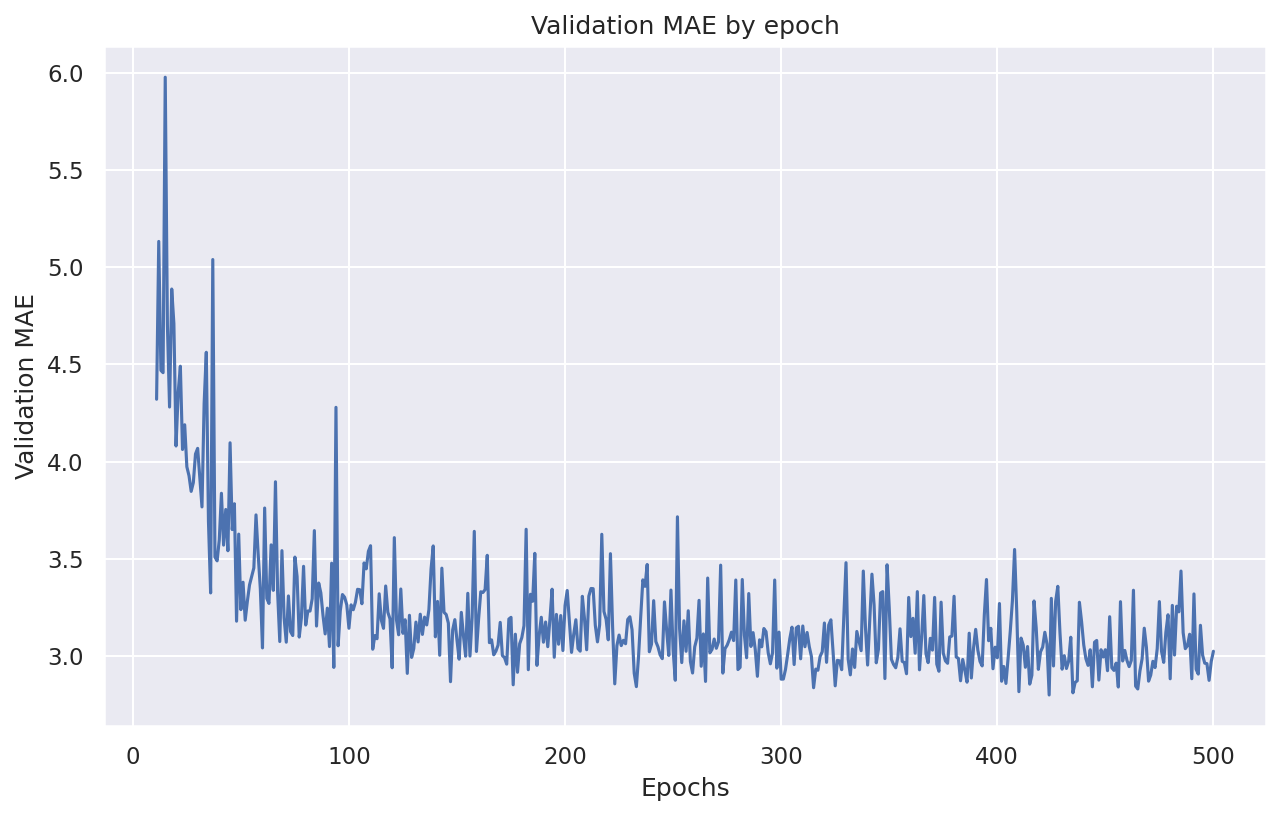

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(11, len(average_mae_error) + 1), average_mae_error[10:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title('Validation MAE by epoch')
plt.show()

### Training the final model

In [41]:
EPOCHS = 100
model = build_model()
model.fit(train_data, train_targets,
          epochs = EPOCHS, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 36.2770 - mae: 4.2670


In [42]:
test_mae_score

4.266951084136963